In [26]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import sklearn.neighbors as nei
import sklearn.svm as svm
import sklearn.tree as tree
import random as rm
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

In [20]:
n=50.0
rok=[]
roktest=[]

for i in range(int(n)):
    for s in range(int(n)):
        j=rm.random()*8-4
        k=rm.random()*8-4
        rok.append([j,k])

X=np.asarray(rok)
Y=[]
for x in rok:
    resp=0
    lens=[1, 2, 3, 4]
    con2=0
    for m in [[2,2], [3,-3], [-2,-2], [-3,2]]:  
        con=0
        i=0
        for s in x:
            i=i+(s-m[con])**2
            con=con+1
        if i<=lens[con2]:
            resp=1
        con2=con2+1
    Y.append([resp])
Y=np.asarray(Y)
X=np.asarray(X)

for i in range(int(n)):
    for s in range(int(n)):
        j=rm.random()*8-4
        k=rm.random()*8-4
        roktest.append([j,k])

Xtest=np.asarray(roktest)
Ytest=[]
for x in roktest:
    resp=0
    lens=[1, 2, 3, 4]
    con2=0
    for m in [[2,2], [3,-3], [-2,-2], [-3,2]]:  
        con=0
        i=0
        for s in x:
            i=i+(s-m[con])**2
            con=con+1
        if i<=lens[con2]:
            resp=1
        con2=con2+1
    Ytest.append([resp])
Ytest=np.asarray(Ytest)
Xtest=np.asarray(Xtest)

n=100.0
rok=[]
for i in range(int(n)):
    for s in range(int(n)):
        j=(i/n)*8-4
        k=(s/n)*8-4
        rok.append([j,k])

Colors=np.asarray(rok)

[[  4.40127906e-07]]
[[-0.40049255  4.4550519   0.84335393 -3.69813752 -1.26670837  5.68874693
   4.39788675 -3.30685019  6.30627108]
 [ 5.02344608  0.57945538  5.93644619 -1.97694767 -6.3749361   1.3423357
   1.03660047 -4.06256294 -1.81021023]]
Accuracy for NN: 
0.9328
Accuracy for Knn: 
0.9724
Accuracy for Svc: 
0.9724


/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


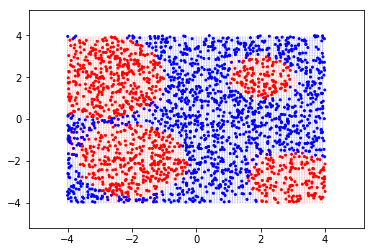

Accuracy for tree with max depth=1
0.7472
Accuracy for tree with max depth=3
0.83


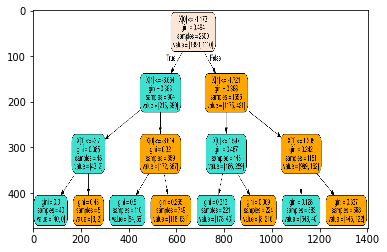

Accuracy for tree with max depth=5
0.904
Accuracy for tree with max depth=7
0.9392
Accuracy for tree with max depth=9
0.9564
Accuracy for tree with max depth=11
0.9636


In [41]:
accuracies=[]
input_size=2
for mid in [9]:
    middle_size=mid
    output_layer_size=1
    #Los placeholders son para los datos de entrada
    x = tf.placeholder(tf.float32, [None, input_size])
    y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
    #La variables para lo que se va a ir calculando y modificando en el camino
    W_layer1=tf.Variable(tf.random_uniform([input_size,middle_size], -1, 1), name="W_layer1")
    W_layer2=tf.Variable(tf.random_uniform([middle_size,output_layer_size], -1, 1), name="W_layer2")
    b_layer1 = tf.Variable(tf.zeros([middle_size]), name="b_layer1")
    b_layer2 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2")
    y = tf.nn.sigmoid(tf.matmul(tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1),W_layer2)+b_layer2) #la de nuestra
    lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
    #lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
    # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)
    init = tf.global_variables_initializer()
    sess = tf.Session() # tipo de sesion, puede ser interactiva
    sess.run(init)
    for i in range(2000):
      sess.run(train_step, feed_dict={x: X, y_: Y})
    #imprimir alguna variable
    print(sess.run(y, feed_dict={x:[[1,0]]}))
    print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))
    Colors_y=sess.run(y, feed_dict={x:Colors})
    correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracies.append(sess.run(accuracy, feed_dict={x: X, y_: Y}))
    print("Accuracy for NN: ")
    print(sess.run(accuracy, feed_dict={x: Xtest, y_: Ytest})) # las corremos
    print("Accuracy for Knn: ")
    knn=nei.KNeighborsClassifier(n_neighbors=5)
    knn.fit(X, Y)
    print(knn.score(Xtest,Ytest))
    print("Accuracy for Svc: ")
    svc=svm.SVC()
    svc.fit(X, Y)
    print(svc.score(Xtest,Ytest))    
    plt.scatter(Xtest[:,0],Xtest[:,1],c=['red' if i==1 else 'blue' for i in Ytest], s=4)
    plt.scatter(Colors[:,0],Colors[:,1],c=['red' if np.round(i)==1 else 'blue' for i in Colors_y], s=0.015)
    x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
    plt.ylim([-5.2,5.2])
    plt.xlim([-5.2,5.2])
    plt.show()
    plt.clf()
    sess.close()
    for md in [1,  3, 5, 7, 9, 11]:
        print("Accuracy for tree with max depth="+str(md))
        tre=tree.DecisionTreeClassifier(max_depth=md)
        tre.fit(X, Y)
        print(tre.score(Xtest,Ytest))  
        if md==3:
            display_tree(tre)
        
    
    
    
    
    

I added a decision tree to the last homework in order to compare the results, it can be just as good as Knn and SVC. The image looks better in the file tree.png in the repository.

In [40]:
def display_tree(tre):
    dot_data = tree.export_graphviz(tre,
                                feature_names=None,
                                out_file=None,
                                filled=True,
                                rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('turquoise', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])

    graph.write_png('/Users/Bernardo/Dropbox/Aprendizaje/Decision-tree/tree.png')
    img = mpimg.imread('/Users/Bernardo/Dropbox/Aprendizaje/Decision-tree/tree.png')
    plt.imshow(img, aspect='auto')
    plt.show()
